### Importing the Libraries


In [198]:
# FOR DATA MANIPULATION
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd

# FOR STATISTICS , TESTS AND MODELLING
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FOR VISUALIZATION
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



### Load the data

In [199]:
# THE DATA IS FROM WORLD BANK
econ_df = pd.read_excel('korea_data.xlsx')

In [200]:
econ_df

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
2,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
3,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
4,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
5,1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
6,1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
7,1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
8,1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057
9,1978,10.774491,34.532492,1.519197,20.3,34.971026,7.924074,5.582315,30.873052,8.340376,3.1673


In [201]:
# A quick google search gave the missing value of BR in 2017 , which is 7
econ_df = econ_df.replace('..',7)
#setting year as index column
econ_df.set_index('Year',inplace = True,drop = True)

# renaming columns
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

econ_df.rename(columns = column_names,inplace=True)

econ_df.dtypes

gdp_growth                 float64
gross_capital_formation    float64
pop_growth                 float64
birth_rate                 float64
broad_money_growth         float64
final_consum_growth        float64
gov_final_consum_growth    float64
gross_cap_form_growth      float64
hh_consum_growth           float64
unemployment               float64
dtype: object

In [202]:
econ_df.isnull().sum()

gdp_growth                 0
gross_capital_formation    0
pop_growth                 0
birth_rate                 0
broad_money_growth         0
final_consum_growth        0
gov_final_consum_growth    0
gross_cap_form_growth      0
hh_consum_growth           0
unemployment               0
dtype: int64

### Looking at data & Outliers


In [203]:
description = econ_df.describe()

# anything above or below 3 S.D. will be treated as outlier
description.loc['+ 3 S.D.'] = description.loc['mean'] + 3*description.loc['std']
description.loc['- 3 S.D.'] = description.loc['mean'] - 3*description.loc['std']

description

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,7.194243,32.405530,1.045240,16.150265,20.113930,5.758657,5.378513,8.988990,5.812430,3.678543
std,4.208579,4.098204,0.516525,6.874087,14.757234,3.615251,2.610390,12.498723,4.209459,0.958478
min,-5.471219,21.404761,0.211998,7.000000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,3.923677,29.943577,0.577957,9.800000,9.885949,2.981150,3.387772,2.417118,2.900586,3.167300
50%,7.432434,32.248290,0.985130,15.100000,17.174170,6.523265,5.031057,7.566111,6.853033,3.700000
75%,10.353951,34.455668,1.519197,21.600000,26.894645,8.168925,7.158110,15.948873,8.927295,4.068000
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+ 3 S.D.,19.819980,44.700143,2.594816,36.772525,64.385633,16.604411,13.209683,46.485158,18.440807,6.553978
- 3 S.D.,-5.431495,20.110918,-0.504335,-4.471994,-24.157774,-5.087096,-2.452657,-28.507178,-6.815947,0.803108


In [204]:
# THE OUTLIERS ARE
test = econ_df[(np.abs(stats.zscore(econ_df))<3).all(axis=1)]
econ_df.index.difference(test.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

##### We can exclude these outliers but it would mean that we are assuming that financial crisis dont happen, when in reality they happen all the time 

## Checking Assumptions

### Linearity

##### As we will be fitting a linear model/OLS , it's obvio a straightline is fitted to the data. Can be Assumed.

### Multicollinearity

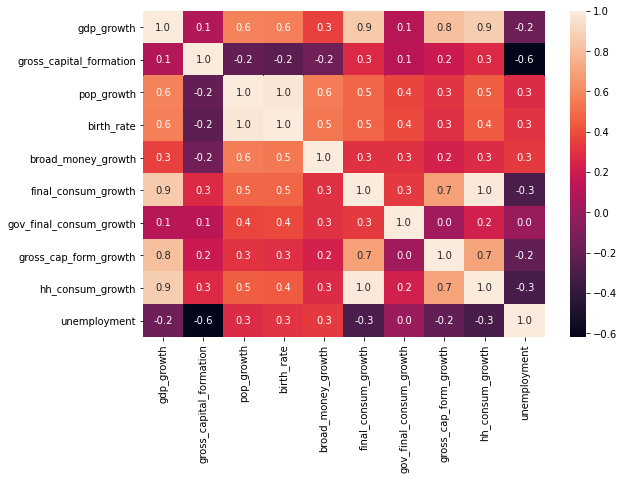

In [205]:
## looking at correlations
plt.figure(figsize=(9,6))
sns.heatmap(econ_df.corr(),annot=True,fmt='.1f');

In [206]:
## High corr between-- 
##                   pop growth & birth_rate,
##                   hh_consum_growth & final_consum_growth etc.

In [207]:
# a more technical approach using variance inflation factor
econ_df_before = econ_df
econ_df_after = econ_df.drop(['gdp_growth','final_consum_growth','birth_rate'],axis=1)

# add constant for VIF
X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index = X1.columns)   
series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index = X2.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       316.070245
gdp_growth                    9.687928
gross_capital_formation       2.411952
pop_growth                   26.164115
birth_rate                   26.745608
broad_money_growth            1.655681
final_consum_growth        2338.243518
gov_final_consum_growth      32.914531
gross_cap_form_growth         3.619815
hh_consum_growth           2154.628586
unemployment                  2.799219
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      197.649347
gross_capital_formation      1.740418
pop_growth                   2.095799
broad_money_growth           1.633589
gov_final_consum_growth      1.291279
gross_cap_form_growth        2.108360
hh_consum_growth             2.832874
unemployment                 2.066759
dtype: float64

###### THUMB RULE REMOVE VARIABLES (ONE OF THE 2) WITH VIF > 5

### Creating an OLS model (for further assumptions requiring residuals)

In [208]:
# Separating the Ind. & Dep. variables
Y = econ_df_before[['gdp_growth']]   #Dep
X = econ_df_after               # Ind

In [209]:
# add constant
X_new = sm.add_constant(X) 
#create model
model = sm.OLS(Y,X_new).fit()


### Normality and Homoscedasticity

In [210]:
# For normality of residuals we build a Q-Q plot & if the data hugs the line tightly;
# this would give us confidence in our assumption that the residuals are normally distributed
# we also check if the mean of residuals is 0.

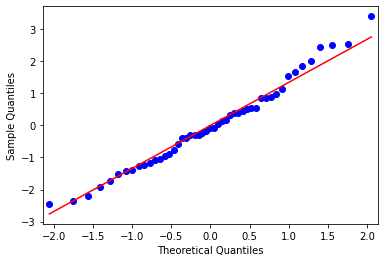

In [211]:
import pylab
sm.qqplot(model.resid,line='s')
pylab.show()

In [212]:
# for 0 mean
mean = sum(model.resid) / len(model.resid) 
print("The mean is",mean)
print("which is very close to 0, so Normality is assumed")

The mean is 5.5465836005762925e-15
which is very close to 0, so Normality is assumed


### For homoscedasticity we do --> The Breusch-Pagan general test where
* The null hypothesis is that the variances for the errors are equal:
    > H0 = σ2i = σ2;
* The alternate hypothesis (the one you’re testing), is that the variances are not equal:
    > H1 = σ2i ≠ σ2
### Our objective is to fail to reject the null hypothesis, alpha set to  standard 0.05

In [213]:
_,pval,_,f_pval = diag.het_breuschpagan(model.resid,model.model.exog)


In [214]:
if pval > 0.05:
    print("As p-value {:.4} is greater than 0.05 , failed to reject null hypothesis".format(pval))
    print("Hence, Homoscedasticity holds according to Breuschpagan test")
    print('-'*100)

As p-value 0.3983 is greater than 0.05 , failed to reject null hypothesis
Hence, Homoscedasticity holds according to Breuschpagan test
----------------------------------------------------------------------------------------------------


## No Autocorrelation

##### We use the Ljung-Box test for no autocorrelation of residuals. (data = residuals here)
* H0: The data are random.
* Ha: The data are not random.

##### We want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation

The lowest p-value found was 0.09154, which is greater than 0.05
We fail to reject the null hypothesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


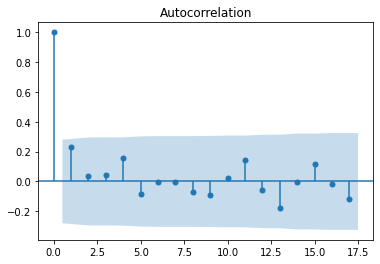

In [215]:
test_results = diag.acorr_ljungbox(model.resid,return_df=False)
test_statistic,pval = test_results
if min(pval) > 0.05:
    print("The lowest p-value found was {:.4}, which is greater than 0.05".format(min(pval)))
    print("We fail to reject the null hypothesis, so there is no autocorrelation.")
    print('-'*100)

sm.graphics.tsa.plot_acf(model.resid)
plt.show()

In [216]:
# the lines shouldn't cross the blue region

### Assumptions are done, checking for insignificant variables

In [217]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     50.41
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           3.89e-18
Time:                        16:59:06   Log-Likelihood:                -84.010
No. Observations:                  49   AIC:                             184.0
Df Residuals:                      41   BIC:                             199.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.2117      2.951      1.766      0.085      -0.747      11.171
gross_capital_formation    -0.0838      0.068     -1.227      0.227      -0.222       0.054
pop_growth                  2.1022      0.594      3.537      0.001       0.902       3.302
broad_money_growth          0.0025      0.018      0.135      0.894      -0.035       0.040
gov_final_consum_growth    -0.1672      0.092     -1.811      0.077      -0.354       0.019
gross_cap_form_growth       0.1265      0.025      5.133      0.000       0.077       0.176
hh_consum_growth            0.5159      0.085      6.085      0.000       0.345       0.687
unemployment               -0.2137      0.318     -0.672      0.505      -0.856       0.429
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.315
Skew:                           0.378   Prob(JB):                        0.518
Kurtosis:                       2.729   Cond. No.                         583.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# look at CI ( If 0 in interval then not significant ) or P_vals ( If > 0.05 then not significant )

In [219]:
X_final = X_new.drop(['gross_capital_formation','broad_money_growth','gov_final_consum_growth',
                     'unemployment'],axis=1)

### Finally rebuilding model

In [220]:
final_model = sm.OLS(Y,X_final).fit()

In [221]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     111.0
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           8.16e-21
Time:                        16:59:07   Log-Likelihood:                -87.296
No. Observations:                  49   AIC:                             182.6
Df Residuals:                      45   BIC:                             190.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1825      0.506      2.337      0.024       0.163       2.202
pop_growth                1.9282      0.470      4.104      0.000       0.982       2.875
gross_cap_form_growth     0.1356      0.025      5.520      0.000       0.086       0.185
hh_consum_growth          0.4779      0.078      6.148      0.000       0.321       0.634
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.529
Skew:                          -0.168   Prob(JB):                        0.768
Kurtosis:                       3.382   Cond. No.                         48.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Looking at the p-vals and CI's , variables are significant
We can interpret the model safely (only after assumtions are T) that if all variables are kept constant (their coeff=0,except pop_growth) then a unit increase in pop_growth would lead to a 1.93% increase in gdp_growth(y/dependent variable)